<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/10-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: Train and Test ML Models

In [20]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [21]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names



Print off the first document and its target classification to make sure its been downloaded correctly. What is the target name of the first document? 

In [22]:
first_doc = docs[0]
first_target = targets[0]
first_target_name = names[0]
print(f"First doc: \n{first_doc}")
print(f"First target: {first_target}")
print(f"First target name: {first_target_name}")


First doc: 
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





First target: 7
First target name: alt.atheism


## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. How many documents are there? What does the class balance look like? Specifically, plot a bar chart showing distribution of the categories (classes). Be sure to label the axis using the target names.

Total docs: 11314


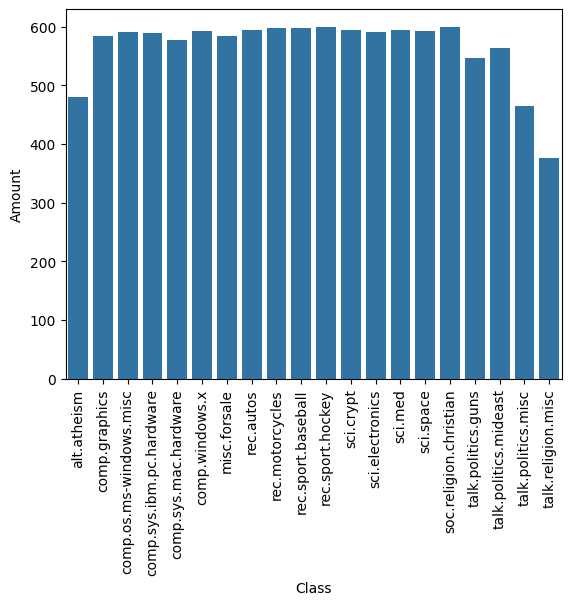

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
total_docs = len(docs)
print(f"Total docs: {total_docs}")

category_names = []
category_amounts = []

for i in range(len(names)):

    category_names.append(names[i])
    count = list(targets).count(i)
    category_amounts.append(count)

class_counts = pd.DataFrame({
    "Class": category_names, "Amount" : category_amounts
    
})



sns.barplot(x="Class", y="Amount", data=class_counts)
plt.xticks(rotation=90)
plt.show()

### Enter comments about your EDA below.

I didn't think there were quite so many documents, formatting the types/amounts like this helped to get a better broad picture of what I'm working with.

## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs)
print(f"Maxtrix shape is: {X.shape}")


Maxtrix shape is: (11314, 129796)


## Exercise 4: Split the Data

Split your data into train and test splits. Use an 80%/20% split rule for train and test respectively.

In [17]:
y = targets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Exercise 5: Train the Model

Using sklearn, train the following classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression
* Random Forests
* At least one other classification method NOT discussed in class.

Use cross validation to perform hyperparameter tuning.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_dist = {"n_neighbors": range(3,30)}
knn = KNeighborsClassifier()
rand_search = RandomizedSearchCV(knn, param_distributions= param_dist, n_iter = 5)
rand_search.fit(X_train, y_train)

best_knn = rand_search.best_estimator_
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)






# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from scipy.stats import randint

# param_dist = {'n_estimators': range(50,500,10),
#               'max_depth': range(1,20)}


# rf = RandomForestClassifier()# Create a random forest classifier


# rand_search = RandomizedSearchCV(rf, # find best hyperparameters
#                                  param_distributions = param_dist, 
#                                  n_iter=5)


# rand_search.fit(X_train, y_train)#fit random search object to the data



Accuracy is: 0.483429076447194


In [ ]:
from sklearn import tree
param_dist = {"max_depth": range(2,10), "min_samples_split": range(2,10)}
dt = tree.DecisionTreeClassifier()
rand_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5)
rand_search.fit(X_train, y_train)
best_dt = rand_search.best_estimator_

dt = tree.DecisionTreeClassifier(random_state = 123)
dt.fit(X_train, y_train)


y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")


y_pred = best_knn.predict(x_test) #CHANGE FROM BEST_KNN
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")




Accuracy is: 0.6482545293857711


TypeError: KNeighborsClassifier.predict() takes 2 positional arguments but 3 were given

In [29]:
# Train the model using the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(x_test)



accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.8855501546619532


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


param_dist = {'n_estimators': range(50,500,10),
              'max_depth': range(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BE87619090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BE81426BA0>})

In [31]:
# Train the model using the Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.8585947856827221


In [32]:
# Train the model using some other method


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.8585947856827221


## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

In [ ]:
# Evaluate the KNN Cluster model

In [ ]:
# Evaluate the Decision Tree model

In [ ]:
# Evaluate the Logistic Regression model

In [ ]:
# Evaluate the Random Forest Model

In [ ]:
# Evaluate the other chosen model

Discuss which one performs the best:

(Write Discussion Here)